In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# import libraries and set display options
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import cm
import matplotlib.dates as mdates
plt.style.use('ggplot') # set style for graphs

# set frame width and center output
from IPython.core.display import display, HTML
display(HTML("""
<style>
.container {width:84% !important;
}
</style>
"""))

# pretty print options
pd.options.display.float_format = '{:20,.4f}'.format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 3000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

# open file
x_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

# strip brackets and trailing space from country names
# replace remaining space with underscore
# lower case all column names
x_rates.columns = x_rates.columns.str.replace("[","").str.replace("]","")
x_rates.columns = x_rates.columns.str.rstrip()
x_rates.columns = x_rates.columns.str.replace(" ","_")
x_rates.columns = x_rates.columns.str.lower()

# rename columns
x_rates.rename(columns={"period\\unit:":"date",
                        "chinese_yuan_renminbi":"chinese_yuan",
                        "uk_pound_sterling":"uk_pound"}, inplace=True)

# convert datetime
x_rates["date"] = pd.to_datetime(x_rates["date"])

# resort and reindex
x_rates.sort_values("date", inplace=True)
x_rates.reset_index(drop=True, inplace=True)

# convert hyphens in currency columns to NaN
import numpy as np
x_rates = x_rates.replace("-", np.nan)

# convert exchange rate values to float
x_rates.iloc[:,1:] = x_rates.iloc[:,1:].astype(float)

display(x_rates.head())

/var/folders/bz/5cj1tzbj5xn319rpqrw6gpmh0000gn/T/ipykernel_25678/2505407553.py:33: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  x_rates.columns = x_rates.columns.str.replace("[","").str.replace("]","")


,date,australian_dollar,bulgarian_lev,brazilian_real,canadian_dollar,swiss_franc,chinese_yuan,cypriot_pound,czech_koruna,danish_krone,estonian_kroon,uk_pound,greek_drachma,hong_kong_dollar,croatian_kuna,hungarian_forint,indonesian_rupiah,israeli_shekel,indian_rupee,iceland_krona,japanese_yen,korean_won,lithuanian_litas,latvian_lats,maltese_lira,mexican_peso,malaysian_ringgit,norwegian_krone,new_zealand_dollar,philippine_peso,polish_zloty,romanian_leu,russian_rouble,swedish_krona,singapore_dollar,slovenian_tolar,slovak_koruna,thai_baht,turkish_lira,us_dollar,south_african_rand
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.5823,35.1070,7.4501,15.6466,0.7111,327.1500,9.1332,NaN,251.4800,"9,433.6100",NaN,NaN,81.4800,133.7300,"1,398.5900",4.7170,0.6668,0.4432,11.6446,4.4798,8.8550,2.2229,45.5100,4.0712,1.3111,25.2875,9.4696,1.9554,189.0450,42.9910,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.5823,34.9170,7.4495,15.6466,0.7122,324.7000,9.1341,NaN,250.8000,"9,314.5100",NaN,NaN,81.5300,130.9600,"1,373.0100",4.7174,0.6657,0.4432,11.5960,4.4805,8.7745,2.2011,44.7450,4.0245,1.3168,26.5876,9.4025,1.9655,188.7750,42.8480,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.5820,34.8500,7.4452,15.6466,0.7076,324.7200,9.1010,NaN,250.6700,"9,337.6800",NaN,NaN,81.5400,131.4200,"1,359.5400",4.6994,0.6649,0.4420,11.4705,4.4637,8.7335,2.1890,44.8720,4.0065,1.3168,27.4315,9.3050,1.9699,188.7000,42.7780,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.5819,34.8860,7.4431,15.6466,0.7058,324.4000,9.0131,NaN,250.0900,"9,218.7700",NaN,NaN,81.0600,129.4300,"1,337.1600",4.6548,0.6627,0.4413,11.5511,4.4203,8.6295,2.1531,44.4360,4.0165,1.3092,26.9876,9.1800,1.9436,188.8000,42.7650,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.5819,34.9380,7.4433,15.6466,0.7094,324.0000,9.0302,NaN,250.1500,"9,321.6300",NaN,NaN,80.9900,130.0900,"1,366.7300",4.6643,0.6654,0.4419,11.4414,4.4295,8.5900,2.1557,44.2950,4.0363,1.3143,27.2075,9.1650,1.9537,188.8400,42.5600,42.5590,0.3718,1.1659,6.7855


In [3]:
# create a list of data frames for each currency with
# the log rate of the exchange rate, 30 day rolling mean, and year
df_dict = {}
for currency in x_rates.columns[1:]:
    df_name = currency
    df = x_rates[["date", currency]].copy()
#     df = df[df[currency].notna()]
    df["log_rate"] = np.log(df.iloc[:,1]/df.iloc[:,1].shift()) # getting the log of the exchange rate # double check this is the correct way to get log
    df["rolling_mean_30"] = df[currency].rolling(30).mean()
    df["year"] = df["date"].dt.year
    df_dict[currency] = df

# currencies for comparison
high_freq = [df_dict["us_dollar"], df_dict["japanese_yen"], df_dict["uk_pound"], df_dict["australian_dollar"]]
low_freq = [df_dict["israeli_shekel"], df_dict["philippine_peso"], df_dict["malaysian_ringgit"], df_dict["romanian_leu"]]

In [4]:
sept11_row = df_dict["us_dollar"]["date"] == "2001-09-11"
sept11_row = df_dict["us_dollar"][sept11_row]
display(sept11_row)
eesa_row = df_dict["us_dollar"]["date"] == "2008-10-03"
eesa_row = df_dict["us_dollar"][eesa_row]
display(eesa_row)
edc_row = df_dict["us_dollar"]["date"] == "2012-09-06"
edc_row = df_dict["us_dollar"][edc_row]
display(edc_row)

,date,us_dollar,log_rate,rolling_mean_30,year
701,2001-09-11,0.8964,-0.0092,0.8995,2001


,date,us_dollar,log_rate,rolling_mean_30,year
2544,2008-10-03,1.3834,-0.0050,1.4386,2008


,date,us_dollar,log_rate,rolling_mean_30,year
3568,2012-09-06,1.2638,0.0048,1.2414,2012


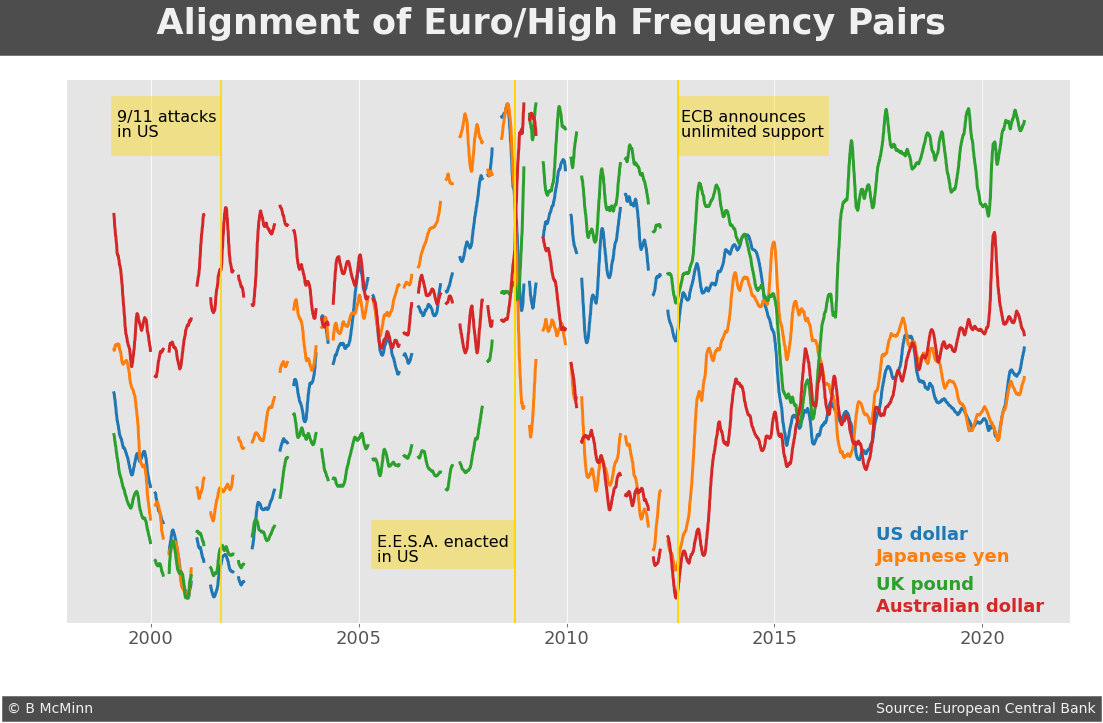

In [5]:
# widget can be turned on and off to discover specific dates
# %matplotlib widget
# line graph showing Euro to four high frequency trading pairs overlapped
chart_date_high = (df_dict["us_dollar"]["date"])
colors = iter([plt.cm.tab10(i) for i in range(0,4)])
fig, ax = plt.subplots(figsize=(18,10))
ax1 = ax.twinx()
ax2 = ax.twinx()
ax3 = ax.twinx()
for ax, currency in zip ((ax, ax1,ax2,ax3), high_freq):
    ax.plot(chart_date_high, currency["rolling_mean_30"], linewidth=3, c=next(colors))
# for ax in ax, ax1, ax2, ax3:
    ax.set_xticks(["2000-01-04 00:00:00", "2005-01-04 00:00:00", "2010-01-04 00:00:00",
               "2015-01-04 00:00:00", "2020-01-04 00:00:00"])
    ax.set_xticklabels([2000,2005,2010,2015,2020], fontsize=18)
    ax.set(yticks=[])
# Sept 11, 2001
ax.axvline(x=chart_date_high.iloc[701], alpha=0.8, color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[11], xmax=chart_date_high.iloc[701],
           ymax=0.97,  ymin=0.86, alpha=0.4, color='gold')
ax.text(0.165, 0.82, "9/11 attacks", color="black", fontsize=16,
        transform=fig.transFigure)
ax.text(0.165, 0.8, "in US", color="black", fontsize=16,
        transform=fig.transFigure)
# EESA
# https://en.wikipedia.org/wiki/Emergency_Economic_Stabilization_Act_of_2008
ax.axvline(x=chart_date_high.iloc[2544], color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[1644], xmax=chart_date_high.iloc[2544],
           ymax=0.19,  ymin=0.10, alpha=0.4, color='gold')
ax.text(0.365, 0.23, "E.E.S.A. enacted", color="black", fontsize=16,
        transform=fig.transFigure)
ax.text(0.365, 0.21, "in US", color="black", fontsize=16,
        transform=fig.transFigure)
# European Debt Crisis
# https://www.businessinsider.com/s?q=euro+forex+2012
# https://www.ecb.europa.eu/pub/pdf/scpwps/ecbwp1532.pdf
ax.axvline(x=chart_date_high.iloc[3568], color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[3568], xmax=chart_date_high.iloc[4488],
           ymax=0.97,  ymin=0.86, alpha=0.4, color='gold')
ax.text(0.60, 0.82, "ECB announces", color="black", fontsize=16,
        transform=fig.transFigure)
ax.text(0.60, 0.8, "unlimited support", color="black", fontsize=16,
        transform=fig.transFigure)
fig.suptitle(" "*12 + "Alignment of Euro/High Frequency Pairs" + " "*12,
             color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=35, weight="bold")
ax.text(0.75, 0.24, "US dollar", color="tab:blue", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.75, 0.21, "Japanese yen", color="tab:orange", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.75, 0.17, "UK pound", color="tab:green", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.75, 0.14, "Australian dollar", color="tab:red", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.08, 0.0, "© B McMinn" + " "*174 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=14,
        transform=fig.transFigure)
plt.show()

In [6]:
# *****
# Here is all the same stuff but with NaN excluded
# For the Major Pairs graph, the vlines slowly get pushed right

In [7]:
# create a list of data frames for each currency with
# the log rate of the exchange rate, 30 day rolling mean, and year
df_dict = {}
for currency in x_rates.columns[1:]:
    df_name = currency
    df = x_rates[["date", currency]].copy()
    df = df[df[currency].notna()]
    df["log_rate"] = np.log(df.iloc[:,1]/df.iloc[:,1].shift()) # getting the log of the exchange rate # double check this is the correct way to get log
    df["rolling_mean_30"] = df[currency].rolling(30).mean()
    df["year"] = df["date"].dt.year
    df_dict[currency] = df

# currencies for comparison
high_freq = [df_dict["us_dollar"], df_dict["japanese_yen"], df_dict["uk_pound"], df_dict["australian_dollar"]]
low_freq = [df_dict["israeli_shekel"], df_dict["philippine_peso"], df_dict["malaysian_ringgit"], df_dict["romanian_leu"]]

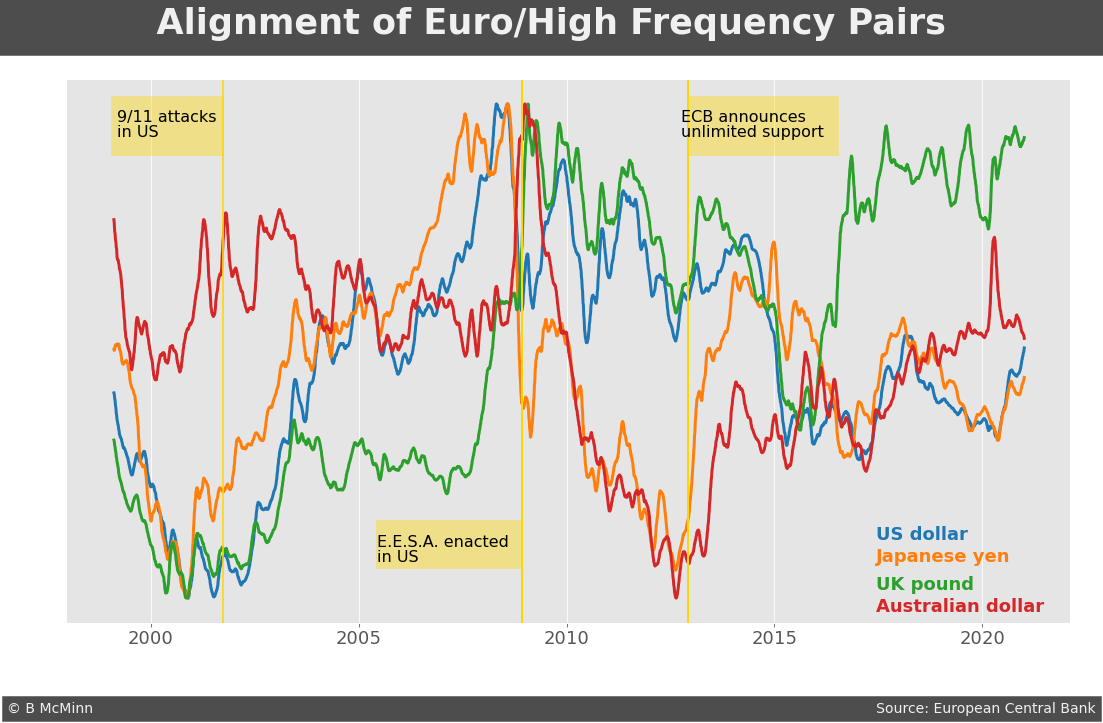

In [8]:
# widget can be turned on and off to discover specific dates
# %matplotlib widget
# line graph showing Euro to four high frequency trading pairs overlapped
chart_date_high = (df_dict["us_dollar"]["date"])
colors = iter([plt.cm.tab10(i) for i in range(0,4)])
fig, ax = plt.subplots(figsize=(18,10))
ax1 = ax.twinx()
ax2 = ax.twinx()
ax3 = ax.twinx()
for ax, currency in zip ((ax, ax1,ax2,ax3), high_freq):
    ax.plot(chart_date_high, currency["rolling_mean_30"], linewidth=3, c=next(colors))
# for ax in ax, ax1, ax2, ax3:
    ax.set_xticks(["2000-01-04 00:00:00", "2005-01-04 00:00:00", "2010-01-04 00:00:00",
               "2015-01-04 00:00:00", "2020-01-04 00:00:00"])
    ax.set_xticklabels([2000,2005,2010,2015,2020], fontsize=18)
    ax.set(yticks=[])
# Sept 11, 2001
ax.axvline(x=chart_date_high.iloc[701], alpha=0.8, color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[11], xmax=chart_date_high.iloc[701],
           ymax=0.97,  ymin=0.86, alpha=0.4, color='gold')
ax.text(0.165, 0.82, "9/11 attacks", color="black", fontsize=16,
        transform=fig.transFigure)
ax.text(0.165, 0.8, "in US", color="black", fontsize=16,
        transform=fig.transFigure)
# EESA
# https://en.wikipedia.org/wiki/Emergency_Economic_Stabilization_Act_of_2008
ax.axvline(x=chart_date_high.iloc[2544], color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[1644], xmax=chart_date_high.iloc[2544],
           ymax=0.19,  ymin=0.10, alpha=0.4, color='gold')
ax.text(0.365, 0.23, "E.E.S.A. enacted", color="black", fontsize=16,
        transform=fig.transFigure)
ax.text(0.365, 0.21, "in US", color="black", fontsize=16,
        transform=fig.transFigure)
# European Debt Crisis
# https://www.businessinsider.com/s?q=euro+forex+2012
# https://www.ecb.europa.eu/pub/pdf/scpwps/ecbwp1532.pdf
ax.axvline(x=chart_date_high.iloc[3568], color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[3568], xmax=chart_date_high.iloc[4488],
           ymax=0.97,  ymin=0.86, alpha=0.4, color='gold')
ax.text(0.60, 0.82, "ECB announces", color="black", fontsize=16,
        transform=fig.transFigure)
ax.text(0.60, 0.8, "unlimited support", color="black", fontsize=16,
        transform=fig.transFigure)
fig.suptitle(" "*12 + "Alignment of Euro/High Frequency Pairs" + " "*12,
             color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=35, weight="bold")
ax.text(0.75, 0.24, "US dollar", color="tab:blue", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.75, 0.21, "Japanese yen", color="tab:orange", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.75, 0.17, "UK pound", color="tab:green", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.75, 0.14, "Australian dollar", color="tab:red", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.08, 0.0, "© B McMinn" + " "*174 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=14,
        transform=fig.transFigure)
plt.show()

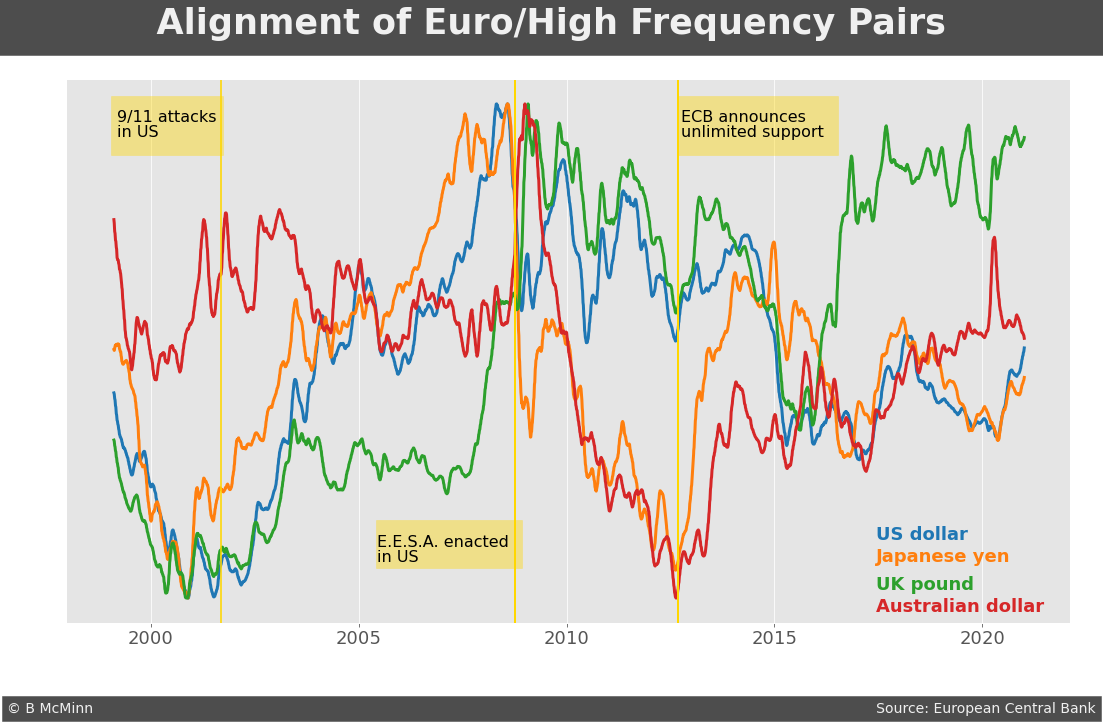

In [9]:
# in this version I tie the v line to the date and this puts it in the right place,
# but the background shade box can't align on the date, it needs an index number to make into an axis
# line graph showing Euro to four high frequency trading pairs overlapped
chart_date_high = (df_dict["us_dollar"]["date"])
colors = iter([plt.cm.tab10(i) for i in range(0,4)])
fig, ax = plt.subplots(figsize=(18,10))
ax1 = ax.twinx()
ax2 = ax.twinx()
ax3 = ax.twinx()
for ax, currency in zip ((ax, ax1,ax2,ax3), high_freq):
    ax.plot(chart_date_high, currency["rolling_mean_30"], linewidth=3, c=next(colors))
# for ax in ax, ax1, ax2, ax3:
    ax.set_xticks(["2000-01-04 00:00:00", "2005-01-04 00:00:00", "2010-01-04 00:00:00",
               "2015-01-04 00:00:00", "2020-01-04 00:00:00"])
    ax.set_xticklabels([2000,2005,2010,2015,2020], fontsize=18)
    ax.set(yticks=[])
# Sept 11, 2001
sept11 = df_dict["us_dollar"]["date"] == "2001-09-11"
sept11 = df_dict["us_dollar"][sept11]
sept11 = sept11["date"]
ax.axvline(x=sept11, alpha=0.8, color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[11], xmax=chart_date_high.iloc[701],
           ymax=0.97,  ymin=0.86, alpha=0.4, color='gold')
ax.text(0.165, 0.82, "9/11 attacks", color="black", fontsize=16,
        transform=fig.transFigure)
ax.text(0.165, 0.8, "in US", color="black", fontsize=16,
        transform=fig.transFigure)
# EESA
# https://en.wikipedia.org/wiki/Emergency_Economic_Stabilization_Act_of_2008
eesa = df_dict["us_dollar"]["date"] == "2008-10-03"
eesa = df_dict["us_dollar"][eesa]
eesa = eesa["date"]
ax.axvline(x=eesa, color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[1644], xmax=chart_date_high.iloc[2544],
           ymax=0.19,  ymin=0.10, alpha=0.4, color='gold')
ax.text(0.365, 0.23, "E.E.S.A. enacted", color="black", fontsize=16,
        transform=fig.transFigure)
ax.text(0.365, 0.21, "in US", color="black", fontsize=16,
        transform=fig.transFigure)
# European Debt Crisis
# https://www.businessinsider.com/s?q=euro+forex+2012
# https://www.ecb.europa.eu/pub/pdf/scpwps/ecbwp1532.pdf
edc = df_dict["us_dollar"]["date"] == "2012-09-06"
edc = df_dict["us_dollar"][edc]
edc = edc["date"]
ax.axvline(x=edc, color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[3508], xmax=chart_date_high.iloc[4488],
           ymax=0.97,  ymin=0.86, alpha=0.4, color='gold')
ax.text(0.60, 0.82, "ECB announces", color="black", fontsize=16,
        transform=fig.transFigure)
ax.text(0.60, 0.8, "unlimited support", color="black", fontsize=16,
        transform=fig.transFigure)
# other text
fig.suptitle(" "*12 + "Alignment of Euro/High Frequency Pairs" + " "*12,
             color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=35, weight="bold")
ax.text(0.75, 0.24, "US dollar", color="tab:blue", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.75, 0.21, "Japanese yen", color="tab:orange", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.75, 0.17, "UK pound", color="tab:green", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.75, 0.14, "Australian dollar", color="tab:red", fontsize=18, weight="bold",
        transform=fig.transFigure)
ax.text(0.08, 0.0, "© B McMinn" + " "*174 + "Source: European Central Bank",
        color = "#f0f0f0", backgroundcolor = "#4d4d4d", fontsize=14,
        transform=fig.transFigure)
plt.show()

In [10]:
edc_row = df_dict["us_dollar"]["date"] == "2012-09-06"
edc_row = df_dict["us_dollar"][edc_row]
display(edc_row)
display(edc)

,date,us_dollar,log_rate,rolling_mean_30,year
3568,2012-09-06,1.2638,0.0048,1.2414,2012


3568   2012-09-06
Name: date, dtype: datetime64[ns]

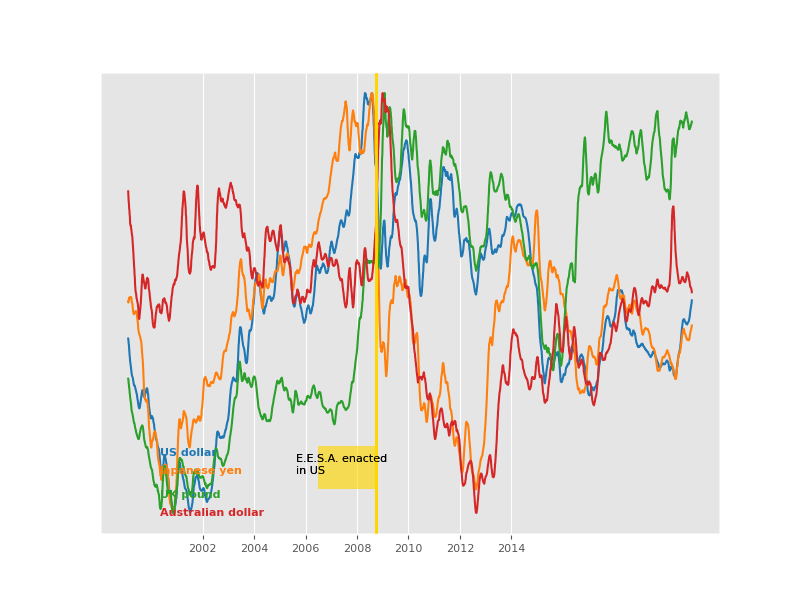

In [34]:
# line graph showing Euro to four high frequency trading pairs overlapped
%matplotlib widget
fig, ax = plt.subplots(figsize=(8,6))
ax1 = ax.twinx()
ax2 = ax.twinx()
ax3 = ax.twinx()
line = ax.plot(chart_date_high, df_dict["us_dollar"]["rolling_mean_30"],
               'tab:blue')
line_1 = ax1.plot(chart_date_high, df_dict["japanese_yen"]["rolling_mean_30"],
                  'tab:orange')
line_2 = ax2.plot(chart_date_high, df_dict["uk_pound"]["rolling_mean_30"],
                  'tab:green')
line_3 = ax3.plot(chart_date_high, df_dict["australian_dollar"]["rolling_mean_30"],
                  'tab:red')
ax.axvline(x=eesa, color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[1924], xmax=chart_date_high.iloc[2504],
           ymax=0.19,  ymin=0.1, alpha=0.4, color='gold')
ax.text(0.37, 0.23, "E.E.S.A. enacted", color="black", fontsize=8,
        transform=fig.transFigure)
ax.text(0.37, 0.21, "in US", color="black", fontsize=8,
        transform=fig.transFigure)
for ax in ax, ax1, ax2, ax3:
    ax.set(yticks=[])
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%y'))
    ax.set_xticks(["2002-01-04 00:00:00", "2004-01-04 00:00:00", "2006-01-04 00:00:00",
                   "2008-01-04 00:00:00", "2010-01-04 00:00:00", "2012-01-04 00:00:00",
                   "2014-01-04 00:00:00"])
    ax.set_xticklabels([2002,2004,2006,2008,2010,2012,2014], fontsize=8)
# eesa
ax.axvline(x=eesa, color="gold", linewidth=2)
ax.axvspan(xmin=chart_date_high.iloc[1924], xmax=chart_date_high.iloc[2504],
           ymax=0.19,  ymin=0.1, alpha=0.4, color='gold')
ax.text(0.37, 0.23, "E.E.S.A. enacted", color="black", fontsize=8,
        transform=fig.transFigure)
ax.text(0.37, 0.21, "in US", color="black", fontsize=8,
        transform=fig.transFigure)
ax.text(0.20, 0.24, "US dollar", color="tab:blue", fontsize=8, weight="bold",
        transform=fig.transFigure)
ax.text(0.20, 0.21, "Japanese yen", color="tab:orange", fontsize=8, weight="bold",
        transform=fig.transFigure)
ax.text(0.20, 0.17, "UK pound", color="tab:green", fontsize=8, weight="bold",
        transform=fig.transFigure)
ax.text(0.20, 0.14, "Australian dollar", color="tab:red", fontsize=8, weight="bold",
        transform=fig.transFigure)
plt.show()